In this assignment, you will explore and implement the properties of a primary deep learning model called ***multilayer perceptron(MLP)***. Basically, the goal of an MLP is to learn a non-linear mapping from inputs to outputs. We can show this mapping as $y = f(x; \theta)$ , where $x$ is the input and $\theta$ is a vector of all the parameters in the network, which we're trying to learn.  


As you see in the figure, every MLP network consists of an input layer, an output layer, and one or more hidden layers in between. Each layer consists of one or more cells called Neurons. In every Neuron, a dot product between the inputs of the cell and a weight vector is calculated. Theresult of the dot product then goes through a non-linear function (activation function e.g. $tanh$ or $sigmoid$) and gives us the output of the neuron.


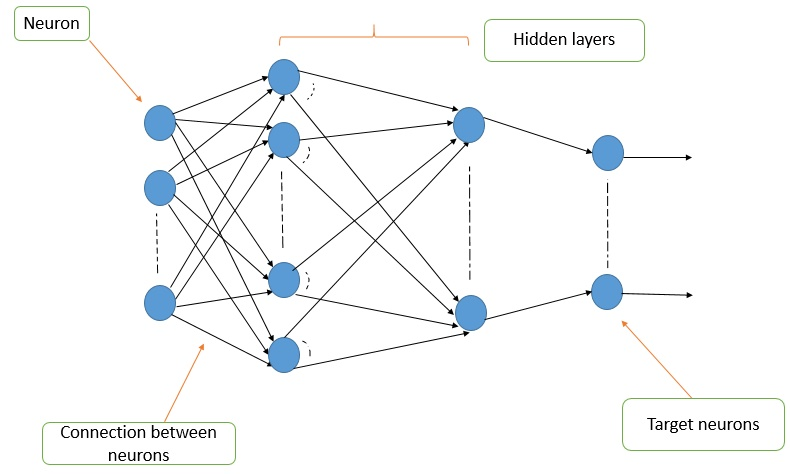



Numpy is the only package you're allowed to use for implementing your MLP in this assignment.

usefule links for MLP:
* [link 1](https://github.com/amanchadha/coursera-deep-learning-specialization/blob/master/C1%20-%20Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/Logistic_Regression_with_a_Neural_Network_mindset_v6a.ipynb)
* [link 2](https://github.com/amanchadha/coursera-deep-learning-specialization/blob/master/C1%20-%20Neural%20Networks%20and%20Deep%20Learning/Week%203/Planar%20data%20classification%20with%20one%20hidden%20layer/Planar_data_classification_with_onehidden_layer_v6c.ipynb)
*[link 3](https://www.anotsorandomwalk.com/backpropagation-example-with-numbers-step-by-step/)

Part1

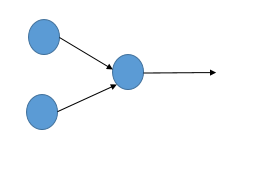

In [1]:
import random
import numpy as np
import sys

In [2]:
weights = [[ 2.86546672e+44],[-3.86215080e+44]]
x = [[-23 , 31]]
print(np.multiply(np.transpose(x), weights))

[[-6.59057346e+45]
 [-1.19726675e+46]]


In [3]:
'''
   implement above network
   inputs : a matrix with (n_samples,2,1) dimension
   output: our target with (n_samples,1) dimension
   weights : a matrix with (2,1) dimension
   bias: a vector with (1) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''
x = []
y = []

#generate data
for i in range(10000):
    x_1 = np.random.randint(-50,50, 1)[0]
    x_2 = np.random.randint(-50,50, 1)[0]
    x.append([x_1,x_2])
    y.append((x_1+2*x_2))

def mse_loss(desierd, predict):
    return (pow((desierd-predict), 2)) #(desierd-predict)^2

def sgd(parameters, activation, lr, feed_out, desierd, x):

    '''parameters[0] = parameters[0] - lr*2*(desierd - feed_out[0])*(-1)*(1/np.exp(feed_out)*(1-1/np.exp(feed_out)))*(x[0][0])
    parameters[1] = parameters[1] - lr*2*(desierd - feed_out[0])*(-1)*(1/np.exp(feed_out)*(1-1/np.exp(feed_out)))*(x[0][1])'''
    # sigmoid function
    sigmoid_desierd = 1/np.exp(-1*desierd)
    
    # wi_new = wi_old - lr * dE/dwi(dE/dY^ * dY^/dh * dh/dwi)
    parameters[0] = parameters[0] - lr*(sigmoid_desierd - feed_out[0])*(-1)*(feed_out[0]*(1-feed_out[0]))*(x[0][0])
    parameters[1] = parameters[1] - lr*(sigmoid_desierd - feed_out[0])*(-1)*(feed_out[0]*(1-feed_out[0]))*(x[0][1])

    return parameters


def mlp(x, y, lr, num_layers, num_neuron, epochs):
    param = []
    activation_function_sigmoid = lambda variable: [1/(np.exp(min(sys.float_info.min,-1*variable)) + 1e-5)] if(variable > 0 )else [1/(np.exp(max(sys.float_info.max, -1*variable)) + 1e-5)]
    '''activation_function_sigmoid = lambda variable: [1/np.exp(-1*out) for out in variable]'''
    for e in range(epochs):
        feed_forward = []
        for i in range(len(x)):
            if e == 0:
                weights = np.random.uniform(low=-1, high=1, size=(num_neuron[0],num_neuron[1]))
                x[i] = np.expand_dims(x[i], axis=0)
                output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x[i]),weights), axis = 0))
                feed_forward.append(output)
                param = sgd(parameters = weights, activation = 'Sigmoid', lr = lr, feed_out = feed_forward[len(feed_forward)-1], desierd = y[i], x = x[i])
            else:
                weights = param
                output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x[i]),weights), axis = 0))
                feed_forward.append(output)
                param = sgd(parameters = weights, activation = 'Sigmoid', lr = lr, feed_out = feed_forward[len(feed_forward)-1], desierd = y[i], x = x[i])
    #test
    x = [-1,6]       
    y = [11]
    x = np.expand_dims(x, axis=0)
    output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x),weights), axis = 0))
    print("Test:", output)
    print(param)

mlp(x,y,0.1, 2,[2,1], 10)      


<ipython-input-3-34f88b06e710>:40: RuntimeWarning: overflow encountered in exp
  activation_function_sigmoid = lambda variable: [1/(np.exp(min(sys.float_info.min,-1*variable)) + 1e-5)] if(variable > 0 )else [1/(np.exp(max(sys.float_info.max, -1*variable)) + 1e-5)]


Test: [0.0]
[[-3.43211491e+43]
 [-2.47898248e+43]]


Part2

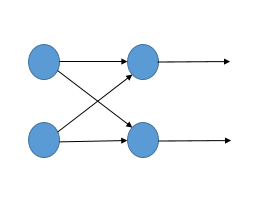

In [4]:
'''
   implement above network
   inputs : a matrix with (n_samples,2,1) dimension
   output: our target with (n_samples, 2) dimension
   weights : a matrix with (2,2) dimension
   bias: a vector with (2) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''
    
def mse_loss(desierd, predict):
    return (np.power(np.subtract(desierd,predict),2)) #(desierd-predict)^2

def sgd(parameters, activation, lr, feed_out, desierd, x):

    '''parameters[0] = parameters[0] - lr*2*(desierd - feed_out[0])*(-1)*(1/np.exp(feed_out)*(1-1/np.exp(feed_out)))*(x[0][0])
    parameters[1] = parameters[1] - lr*2*(desierd - feed_out[0])*(-1)*(1/np.exp(feed_out)*(1-1/np.exp(feed_out)))*(x[0][1])'''
    # sigmoid function
    sigmoid_desierd = 1/np.exp(-1*desierd)
    
    for i in range(len(parameters)):
        for j in range(min(0,len(feed_out))):
            parameters[i] = parameters[i] - lr*(sigmoid_desierd - feed_out[j])*(-1)*(feed_out[j]*(1-feed_out[j]))*(x[j][i])

    return parameters

def mlp(x, y, lr, num_layers, num_neuron, epochs):
    param = []
    #activation_function_sigmoid = lambda variable: [1/(np.exp(min(sys.float_info.min,-1*variable)) + 1e-5)] if(variable > 0 )else [1/(np.exp(max(sys.float_info.max, -1*variable)) + 1e-5)]
    activation_function_sigmoid = lambda variable: [1/np.exp(-1*out) for out in variable]
    for e in range(epochs):
        feed_forward = []
        for i in range(len(x)):
            if e == 0:
                weights = np.random.uniform(low=-1, high=1, size=(num_neuron[0],num_neuron[1]))
                x[i] = np.expand_dims(x[i], axis=0)
                output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x[i]),weights), axis = 0))
                feed_forward.append(output)
                param = sgd(parameters = weights, activation = 'Sigmoid', lr = lr, feed_out = feed_forward[len(feed_forward)-1], desierd = y[i], x = x[i])
            else:
                weights = param
                output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x[i]),weights), axis = 0))
                feed_forward.append(output)
                param = sgd(parameters = weights, activation = 'Sigmoid', lr = lr, feed_out = feed_forward[len(feed_forward)-1], desierd = y[i], x = x[i])
    #test
    x = [-1,6]       
    y = [11]
    x = np.expand_dims(x, axis=0)
    output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x),weights), axis = 0))
    print("Test:", output)
    print(param)


    
x = []
y_1 = []
y_2 = []
y = []


#generate data
for i in range(10000):
    x_1 = np.random.randint(-50,50, 1)[0]
    x_2 = np.random.randint(-50,50, 1)[0]
    x.append([x_1,x_2])
    y_1.append((x_1+2*x_2))
    y_2.append((x_1+4*x_2))
    y.append([y_1,y_2])
mlp(x,y,0.1, 2,[2,2], 10)

Test: [0.0029511158244435232, 10.079170587320831]
[[ 0.56731792  0.78633299]
 [-0.87637567  0.51613399]]


In [5]:
desierd = [1,3]
predict = [5,3]
mse_loss(desierd,predict)

array([16,  0], dtype=int32)

Part3

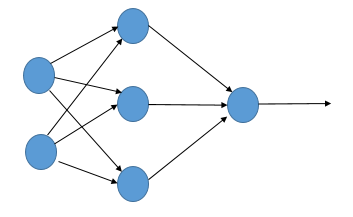

In [8]:
'''
   implement above network
   inputs : a matrix with (n_samples,2,1) dimension
   output: our target with (n_samples, 1) dimension
   weights : a matrix with ((2,3), (3,1)) dimension
   bias: a vector with ((3),(1)) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''

def mse_loss(desierd, predict):
    return (np.power(np.subtract(desierd,predict),2)) #(desierd-predict)^2


def sgd(parameters, activation, lr, feed_out, desierd, x):

    '''parameters[0] = parameters[0] - lr*2*(desierd - feed_out[0])*(-1)*(1/np.exp(feed_out)*(1-1/np.exp(feed_out)))*(x[0][0])
    parameters[1] = parameters[1] - lr*2*(desierd - feed_out[0])*(-1)*(1/np.exp(feed_out)*(1-1/np.exp(feed_out)))*(x[0][1])'''
    # sigmoid function
    sigmoid_desierd = 1/np.exp(-1*desierd)
    
    for i in range(len(parameters)):
        for j in range(min(0,len(feed_out))):
            parameters[i] = parameters[i] - lr*(sigmoid_desierd - feed_out[j])*(-1)*(feed_out[j]*(1-feed_out[j]))*(x[j][i])*(x[j][i]*(1-x[j][i]))

    return parameters


def mlp(x, y, lr, num_layers, num_neuron, epochs):
    param = []
    #activation_function_sigmoid = lambda variable: [1/(np.exp(min(sys.float_info.min,-1*variable)) + 1e-5)] if(variable > 0 )else [1/(np.exp(max(sys.float_info.max, -1*variable)) + 1e-5)]
    activation_function_sigmoid = lambda variable: [1/np.exp(-1*out) for out in variable]
    for e in range(epochs):
        feed_forward = []
        for i in range(len(x)):
            if e == 0:
                weights = np.random.uniform(low=-1, high=1, size=(num_neuron[0],num_neuron[1]))
                x[i] = np.expand_dims(x[i], axis=0)
                output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x[i]),weights), axis = 0))
                feed_forward.append(output)
                param = sgd(parameters = weights, activation = 'Sigmoid', lr = lr, feed_out = feed_forward[len(feed_forward)-1], desierd = y[i], x = x[i])
            else:
                weights = param
                output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x[i]),weights), axis = 0))
                feed_forward.append(output)
                param = sgd(parameters = weights, activation = 'Sigmoid', lr = lr, feed_out = feed_forward[len(feed_forward)-1], desierd = y[i], x = x[i])
    #test
    x = [-1,6]       
    y = [11]
    x = np.expand_dims(x, axis=0)
    output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x),weights), axis = 0))
    print("Test:", output)
    print(param)
    
    
x = []
h_1 = []
h_2 = []
h_3 = []
h = []
y = []


#generate data
for i in range(10000):
    x_1 = np.random.randint(-50,50, 1)[0]
    x_2 = np.random.randint(-50,50, 1)[0]
    h_1 = np.random.randint(-50,50,1)[0]
    h_2 = np.random.randint(-50,50,1)[0]
    h_3 = np.random.randint(-50,50,1)[0]
    x.append([x_1,x_2])
    y.append((h_1+2*h_2+3*h_3))
mlp(x,y,0.1, 3,[2,1], 10)

Test: [0.035926320242269306]
[[-0.21790111]
 [-0.5906977 ]]


Part4

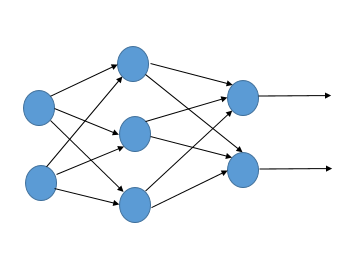

In [14]:
'''
   implement above network
   inputs : a matrix with (n_samples,2,1) dimension
   output: our target with (n_samples, 2) dimension
   weights : a matrix with ((2,3), (3,2)) dimension
   bias: a vector with ((3),(2)) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''


def mse_loss(desierd, predict):
    return (np.power(np.subtract(desierd,predict),2)) #(desierd-predict)^2


def sgd(parameters, activation, lr, feed_out, desierd, x):

    '''parameters[0] = parameters[0] - lr*2*(desierd - feed_out[0])*(-1)*(1/np.exp(feed_out)*(1-1/np.exp(feed_out)))*(x[0][0])
    parameters[1] = parameters[1] - lr*2*(desierd - feed_out[0])*(-1)*(1/np.exp(feed_out)*(1-1/np.exp(feed_out)))*(x[0][1])'''
    # sigmoid function
    sigmoid_desierd = 1/np.exp(-1*desierd)
    
    for i in range(len(parameters)):
        for j in range(min(0,len(feed_out))):
            parameters[i] = parameters[i] - lr*(sigmoid_desierd - feed_out[j])*(-1)*(feed_out[j]*(1-feed_out[j]))*(x[j][i])*(x[j][i]*(1-x[j][i]))

    return parameters


def mlp(x, y, lr, num_layers, num_neuron, epochs):
    param = []
    #activation_function_sigmoid = lambda variable: [1/(np.exp(min(sys.float_info.min,-1*variable)) + 1e-5)] if(variable > 0 )else [1/(np.exp(max(sys.float_info.max, -1*variable)) + 1e-5)]
    activation_function_sigmoid = lambda variable: [1/np.exp(-1*out) for out in variable]
    for e in range(epochs):
        feed_forward = []
        for i in range(len(x)):
            if e == 0:
                weights = np.random.uniform(low=-1, high=1, size=(num_neuron[0],num_neuron[1]))
                x[i] = np.expand_dims(x[i], axis=0)
                output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x[i]),weights), axis = 0))
                feed_forward.append(output)
                param = sgd(parameters = weights, activation = 'Sigmoid', lr = lr, feed_out = feed_forward[len(feed_forward)-1], desierd = y[i], x = x[i])
            else:
                weights = param
                output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x[i]),weights), axis = 0))
                feed_forward.append(output)
                param = sgd(parameters = weights, activation = 'Sigmoid', lr = lr, feed_out = feed_forward[len(feed_forward)-1], desierd = y[i], x = x[i])
    #test
    x = [-1,6]       
    y = [11]
    x = np.expand_dims(x, axis=0)
    output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x),weights), axis = 0))
    print("Test:", output)
    print(param)
    
    
x = []
h_1 = []
h_2 = []
h_3 = []
h = []
y_1 = []
y_2 = []
y = []


#generate data
for i in range(10000):
    x_1 = np.random.randint(-50,50, 1)[0]
    x_2 = np.random.randint(-50,50, 1)[0]
    h_1 = np.random.randint(-50,50,1)[0]
    h_2 = np.random.randint(-50,50,1)[0]
    h_3 = np.random.randint(-50,50,1)[0]
    x.append([x_1,x_2])
    y_1.append((h_1+2*h_2+3*h_3))
    y_2.append((3*h_1+2*h_2+h_3))
    y.append([y_1,y_2])
mlp(x,y,0.1, 3,[2,3], 10)

Test: [0.05285060600580752, 0.022749916064196622, 355.8139764383892]
[[ 0.61724871  0.32402012 -0.31282051]
 [-0.3871729  -0.57652895  0.92693126]]


Part5

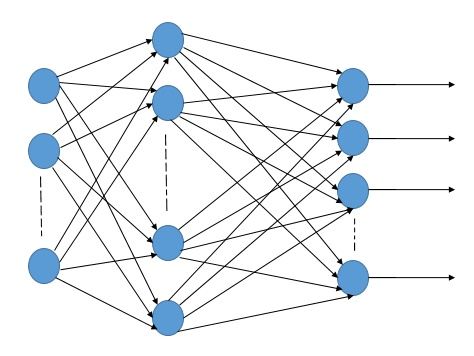

In [50]:
'''
   implement above network
   inputs : a matrix with (n_samples,n,1) dimension
   output: our target with (n_samples, m) dimension
   weights : a matrix with ((input_dimension, hidden_layer_dimension), (hidden_layer_dimension,output_dimension)) dimension
   bias: a vector with ((3),(1)) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''


def mse_loss(desierd, predict):
    return (np.power(np.subtract(desierd,predict),2)) #(desierd-predict)^2


def sgd(parameters, activation, lr, feed_out, desierd, x):

    '''parameters[0] = parameters[0] - lr*2*(desierd - feed_out[0])*(-1)*(1/np.exp(feed_out)*(1-1/np.exp(feed_out)))*(x[0][0])
    parameters[1] = parameters[1] - lr*2*(desierd - feed_out[0])*(-1)*(1/np.exp(feed_out)*(1-1/np.exp(feed_out)))*(x[0][1])'''
    # sigmoid function
    sigmoid_desierd = 1/np.exp(-1*desierd)
    
    for i in range(len(parameters)):
        for j in range(min(0,len(feed_out))):
            parameters[i] = parameters[i] - lr*(sigmoid_desierd - feed_out[j])*(-1)*(feed_out[j]*(1-feed_out[j]))*(x[j][i])*(x[j][i]*(1-x[j][i]))
    return parameters

def mlp(x, y, lr, num_layers, num_neuron, epochs):
    param = []
    #activation_function_sigmoid = lambda variable: [1/(np.exp(min(sys.float_info.min,-1*variable)) + 1e-5)] if(variable > 0 )else [1/(np.exp(max(sys.float_info.max, -1*variable)) + 1e-5)]
    activation_function_sigmoid = lambda variable: [1/np.exp(-1*out) for out in variable]
    for e in range(epochs):
        feed_forward = []
        for i in range(len(x)):
            if e == 0:
                weights = np.random.uniform(low=-1, high=1, size=(num_neuron[0],num_neuron[1]))
                x[i] = np.expand_dims(x[i], axis=0)
                output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x[i]),weights[0]), axis = 0))
                feed_forward.append(output)
                param = sgd(parameters = weights, activation = 'Sigmoid', lr = lr, feed_out = feed_forward[len(feed_forward)-1], desierd = y[i], x = x[i])
            else:
                weights = param
                output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x[i]),weights[0]), axis = 0))
                feed_forward.append(output)
                param = sgd(parameters = weights, activation = 'Sigmoid', lr = lr, feed_out = feed_forward[len(feed_forward)-1], desierd = y[i], x = x[i])
    #test
    x = [-1,6]       
    y = [11]
    x = np.expand_dims(x, axis=0)
    output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x),weights[0]), axis = 0))
    print("Test:", output)
    print(param)
        
n_input_neuron = 10
n_output_neuron = 10
n_hidden_neuron = 30
x = []
for i in range(n_input_neuron):
    tmp = []
    for j in range(100):
        tmp.append(np.random.randint(-50,50, 1)[0])
    x.append(tmp)
h = []
for i in range(n_hidden_neuron):
    tmp = []
    for j in range(100):
        tmp.append(np.random.randint(-50,50, 1)[0])
    h.append(tmp)
y = []
for i in range(n_output_neuron):
    for j in h:
        y.append(sum(j))
mlp(x,y,0.1, 3,[n_input_neuron,n_output_neuron], 10)

Test: [0.45672792660688116, 0.0319547647560064, 18.663308701171466, 6.909500136894508, 0.1974096939306423, 6.659890958672831, 0.2697933896349385, 6.207955345354621, 0.0434888617461593, 11.40698395029662]
[[-0.15673348 -0.6886868   0.5853119   0.38657946 -0.32449481  0.37922062
  -0.26201977  0.36516632 -0.62705009  0.48684516]
 [-0.41961836  0.81796735 -0.46799469  0.45548476  0.23686955 -0.15869954
   0.69999677 -0.67340021 -0.51699159 -0.00115558]
 [ 0.75052597  0.43525848  0.41751689  0.95168386  0.46873685  0.77867901
  -0.44025002 -0.4909274  -0.15095821 -0.28613721]
 [-0.8058691   0.99122503  0.05780336 -0.40288088  0.28571675 -0.46289402
   0.20723476  0.60495966 -0.67103599 -0.31343222]
 [ 0.83132024  0.67949583 -0.26022539 -0.28903636 -0.7016486  -0.54278315
  -0.99848162 -0.7740417  -0.82145747  0.26263156]
 [ 0.4753697   0.80037422 -0.36449161  0.58475163 -0.78620247  0.90219641
  -0.0588254   0.07765141 -0.90820016 -0.35138858]
 [-0.19487079 -0.54150567  0.22889741 -0.39122

In [19]:
print(x)

[[-46, -16, 20, -31, 6], [-11, -21, -14, 46, -7], [-32, -38, 41, -3, -27], [23, -25, 37, -4, 41], [34, 37, -28, 27, -7], [-15, -14, 26, 38, -50], [-8, 21, 44, 29, -40], [-34, 26, 22, -43, -20], [-16, -18, -14, 14, -10], [-12, 3, -35, -2, 48]]


Part6(preferential)

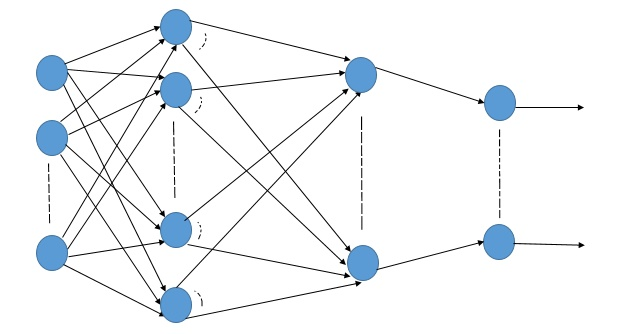

In [54]:
'''
   implement above network
   inputs : a matrix with (n_samples,n,1) dimension
   output: our target with (n_samples, m) dimension
   weights : a matrix for each layer with ((Previous_layer, layer_dimension)) dimension
   bias: a vector for each layer with (layer_dimension) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''
def mse_loss(desierd, predict):
    return (np.power(np.subtract(desierd,predict),2)) #(desierd-predict)^2


def sgd(parameters, activation, lr, feed_out, desierd, x):

    '''parameters[0] = parameters[0] - lr*2*(desierd - feed_out[0])*(-1)*(1/np.exp(feed_out)*(1-1/np.exp(feed_out)))*(x[0][0])
    parameters[1] = parameters[1] - lr*2*(desierd - feed_out[0])*(-1)*(1/np.exp(feed_out)*(1-1/np.exp(feed_out)))*(x[0][1])'''
    # sigmoid function
    sigmoid_desierd = 1/np.exp(-1*desierd)
    
    for i in range(len(parameters)):
        for j in range(min(0,len(feed_out))):
            parameters[i] = parameters[i] - lr*(sigmoid_desierd - feed_out[j])*(-1)*(feed_out[j]*(1-feed_out[j]))*(x[j][i])*(x[j][i]*(1-x[j][i]))
    return parameters

def mlp(x, y, lr, num_layers, num_neuron, epochs):
    param = []
    #activation_function_sigmoid = lambda variable: [1/(np.exp(min(sys.float_info.min,-1*variable)) + 1e-5)] if(variable > 0 )else [1/(np.exp(max(sys.float_info.max, -1*variable)) + 1e-5)]
    activation_function_sigmoid = lambda variable: [1/np.exp(-1*out) for out in variable]
    for e in range(epochs):
        feed_forward = []
        for i in range(len(x)):
            if e == 0:
                weights = np.random.uniform(low=-1, high=1, size=(num_neuron[0],num_neuron[1]))
                x[i] = np.expand_dims(x[i], axis=0)
                output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x[i]),weights[0]), axis = 0))
                feed_forward.append(output)
                param = sgd(parameters = weights, activation = 'Sigmoid', lr = lr, feed_out = feed_forward[len(feed_forward)-1], desierd = y[i], x = x[i])
            else:
                weights = param
                output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x[i]),weights[0]), axis = 0))
                feed_forward.append(output)
                param = sgd(parameters = weights, activation = 'Sigmoid', lr = lr, feed_out = feed_forward[len(feed_forward)-1], desierd = y[i], x = x[i])
    #test
    x = [-1,6]       
    y = [11]
    x = np.expand_dims(x, axis=0)
    output = activation_function_sigmoid(np.sum(np.multiply(np.transpose(x),weights[0]), axis = 0))
    print("Test:", output)
    print(param)
        
n_input_neuron = 10
n_output_neuron = 10
n_hidden_neuron = 30
n_layer_neuron = 5
x = []
for i in range(n_input_neuron):
    tmp = []
    for j in range(100):
        tmp.append(np.random.randint(-50,50, 1)[0])
    x.append(tmp)
h = []
hs = []
for k in range(n_layer_neuron):
    tmp2 = []
    for i in range(n_hidden_neuron):
        tmp = []
        for j in range(100):
            tmp.append(np.random.randint(-50,50, 1)[0])
        h.append(tmp)
    hs.append(h)
y = []
for i in range(n_output_neuron):
    for j in h:
        y.append(sum(j))
mlp(x,y,0.1, n_layer_neuron,[n_input_neuron,n_output_neuron], 20)

Test: [16.633163033564948, 1.1734009620152408, 2.4457308575028653, 0.6462345366624261, 5.824786745940407, 0.5374535770628898, 1.3695842422916082, 3.273578797582904, 0.04846840006377136, 13.284714644802284]
[[ 0.5622797   0.03198127  0.1788688  -0.08731856  0.35242448 -0.12418258
   0.06290144  0.23717676 -0.60536865  0.51732282]
 [ 0.49919271 -0.42661892 -0.76980561 -0.07253996 -0.96731715  0.36476889
  -0.89617297  0.48974899 -0.7191752  -0.98559092]
 [ 0.69274199  0.36040621  0.15404052 -0.24126609  0.56038844 -0.21079544
  -0.1996138  -0.97781216  0.15022974 -0.03216128]
 [-0.36314412 -0.76021829  0.90381216  0.5488876   0.32417046 -0.05599958
   0.23099468 -0.10246144 -0.13113252  0.47553921]
 [-0.8744296   0.89755119  0.34792472 -0.77242753  0.15521219  0.91443424
  -0.32300361  0.07914506 -0.68320699  0.50855388]
 [ 0.64477302 -0.07103568 -0.7141479  -0.7291807  -0.25211538  0.72898935
   0.86714853  0.18278453 -0.87377972  0.39937276]
 [-0.0852879  -0.43977247 -0.1246587   0.072